### Nesse notebook vamos descrever em detalhes todas etapas para uma classificação primária dos exames de pacientes do Hospital Israelita Albert Einstein / SP 

Nesse workshop vamos utilizar modelos de aprendizagem de máquina (Machine Learning - ML) para prever se um paciente tem ou não a COVID-19. Para isso analisaremos apenas exames laboratoriais que não detectam a presença de anti corpos do vírus causador da doença. Nesse estudo vamos analisar dados normalizados e anonimizados de pacientes do hospital Albert Einstein/SP.

Nessa primeira etapa vamos focar na organização dos dados disponibilizados pelo hostiptal no site:
https://www.kaggle.com/einsteindata4u/covid19

Ao final dessa primeira seção serão passadas diretrizes para que vocês possam escrever um código, para determinar se um paciente terá a COVID-19.

Na quinta feira dia 15/10, iremos ter um novo encontro para discutir as classificações feitas e mostrar maneiras de explicar os resultados obtidos.

1. Nesse notebook iremos seguir as etapas:

    1. Importar algumas bibliotecas necessárias para ler e manipular os dados disponibilizados;
    2. Ler os dados;
    3. Entender e organizar os dados disponíveis.

In [1]:
# Uma pergunta para todos, para você o que é uma biblioteca?

#incialmente vamos importar o pandas para a leitura e análise dos dados e numpy para fazer algumas operações
import pandas as pd
import numpy as np

In [2]:
# biblioteca para fazer plot de gráficos
import matplotlib.pyplot as plt

In [3]:
#ler os dados
df = pd.read_excel('dataset.xlsx')

#imprimir as primeiras linhas do DataFrame
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Para nosso objetivo a identificação do paciente não importa, então vamos deletar essa coluna
del df['Patient ID']

In [5]:
# vamos colocar todos os nomes das colunas em letras minúsculas
df = df.rename(columns=str.lower)
df.head()

,patient age quantile,sars-cov-2 exam result,"patient addmited to regular ward (1=yes, 0=no)","patient addmited to semi-intensive unit (1=yes, 0=no)","patient addmited to intensive care unit (1=yes, 0=no)",hematocrit,hemoglobin,platelets,mean platelet volume,red blood cells,...,hb saturation (arterial blood gases),pco2 (arterial blood gas analysis),base excess (arterial blood gas analysis),ph (arterial blood gas analysis),total co2 (arterial blood gas analysis),hco3 (arterial blood gas analysis),po2 (arterial blood gas analysis),arteiral fio2,phosphor,cto2 (arterial blood gas analysis)
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# vamos importar uma biblioteca que vai ajudar a ter uma visão geral do dados 
# https://pypi.org/project/sweetviz/

import sweetviz as sv

df['urine - ph'].replace('Não Realizado', 0.0000001 ,inplace=True)
df['urine - ph'] = pd.to_numeric(df['urine - ph'], errors='coerce')

advert_report = sv.analyze(df, pairwise_analysis='off')

advert_report.show_html('Advertising.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:39  -> (00:00 left)


Report Advertising.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


### 1. Para explorar o dataset de maneira mais efetiva possível será criado um novo dataset com as informações desejadas de cada coluna. Este dataframe será criado através da função chamada EDA

1. Exploratory data analysis - EDA
    1. https://towardsdatascience.com/4-libraries-that-can-perform-eda-in-one-line-of-python-code-b13938a06ae

In [7]:
# Vamos criar uma função customizadas para realizar o EDA
def EDA (df):

    eda_df = {}
    eda_df['Amount_NaN'] = df.isnull().sum()
    eda_df['%_NaN'] = df.isnull().mean().round(2)
    eda_df['DType'] = df.dtypes
    eda_df['Amount_Data'] = df.count()

    
    eda_df['Mean'] = np.round(df.mean(), 2);
    eda_df['Median'] = np.round(df.median(), 2);
    
    eda_df['Max'] = df.max()
    eda_df['Min'] = df.min()
    eda_df['STD'] = np.round(df.std(), 2)
    
    eda = pd.DataFrame(eda_df)
    
    colunas = sorted(df.columns.tolist(), reverse=False)
    eda['Amount_Unique'] = list(map(lambda x: len(df[x].unique().tolist()), colunas))

    return eda

In [8]:
#Chamar a função criada acima para gerar o DataFrame
informacao_df = EDA(df)

#imprimir as primeiras linhas
informacao_df.head()

/home/salem/.local/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,Amount_NaN,%_NaN,DType,Amount_Data,Mean,Median,Max,Min,STD,Amount_Unique
adenovirus,4292,0.76,object,1352,NaN,NaN,NaN,NaN,NaN,3
alanine transaminase,5419,0.96,float64,225,0.0,-0.28,7.93066,-0.641951,1.00,63
albumin,5631,1.00,float64,13,-0.0,-0.04,1.96299,-2.29016,1.04,11
alkaline phosphatase,5500,0.97,float64,144,-0.0,-0.36,3.88285,-0.959028,1.00,83
arteiral fio2,5624,1.00,float64,20,0.0,-0.01,2.84186,-1.53293,1.03,10


### 2. Com esse tipo de abordagem é possível representar gráficamente todas as características graficamente

In [9]:
def gerar_graficos (df):
    
    # definir a fonte utilizada nos gráficos
    plt.rcParams['font.family'] = 'monospace'
    plt.rcParams['font.monospace'] = 'Roboto Mono'
    
    ax = df["%_NaN"].value_counts(normalize=True).plot(kind="bar", figsize=(20, 10), cmap='YlGnBu_r');
    
    #título dos eixos
    ax.set_xlabel("% de dados faltantes", fontsize=26)
    ax.set_ylabel("% de colunas", fontsize=26)

    #tick labels.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor", fontsize = 20);

    plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
             rotation_mode="anchor", fontsize = 20);
    
    #título do gráfico
    plt.title("Dados Faltantes - COVID19 DataSet", fontsize=28);
    
    return (plt.show())

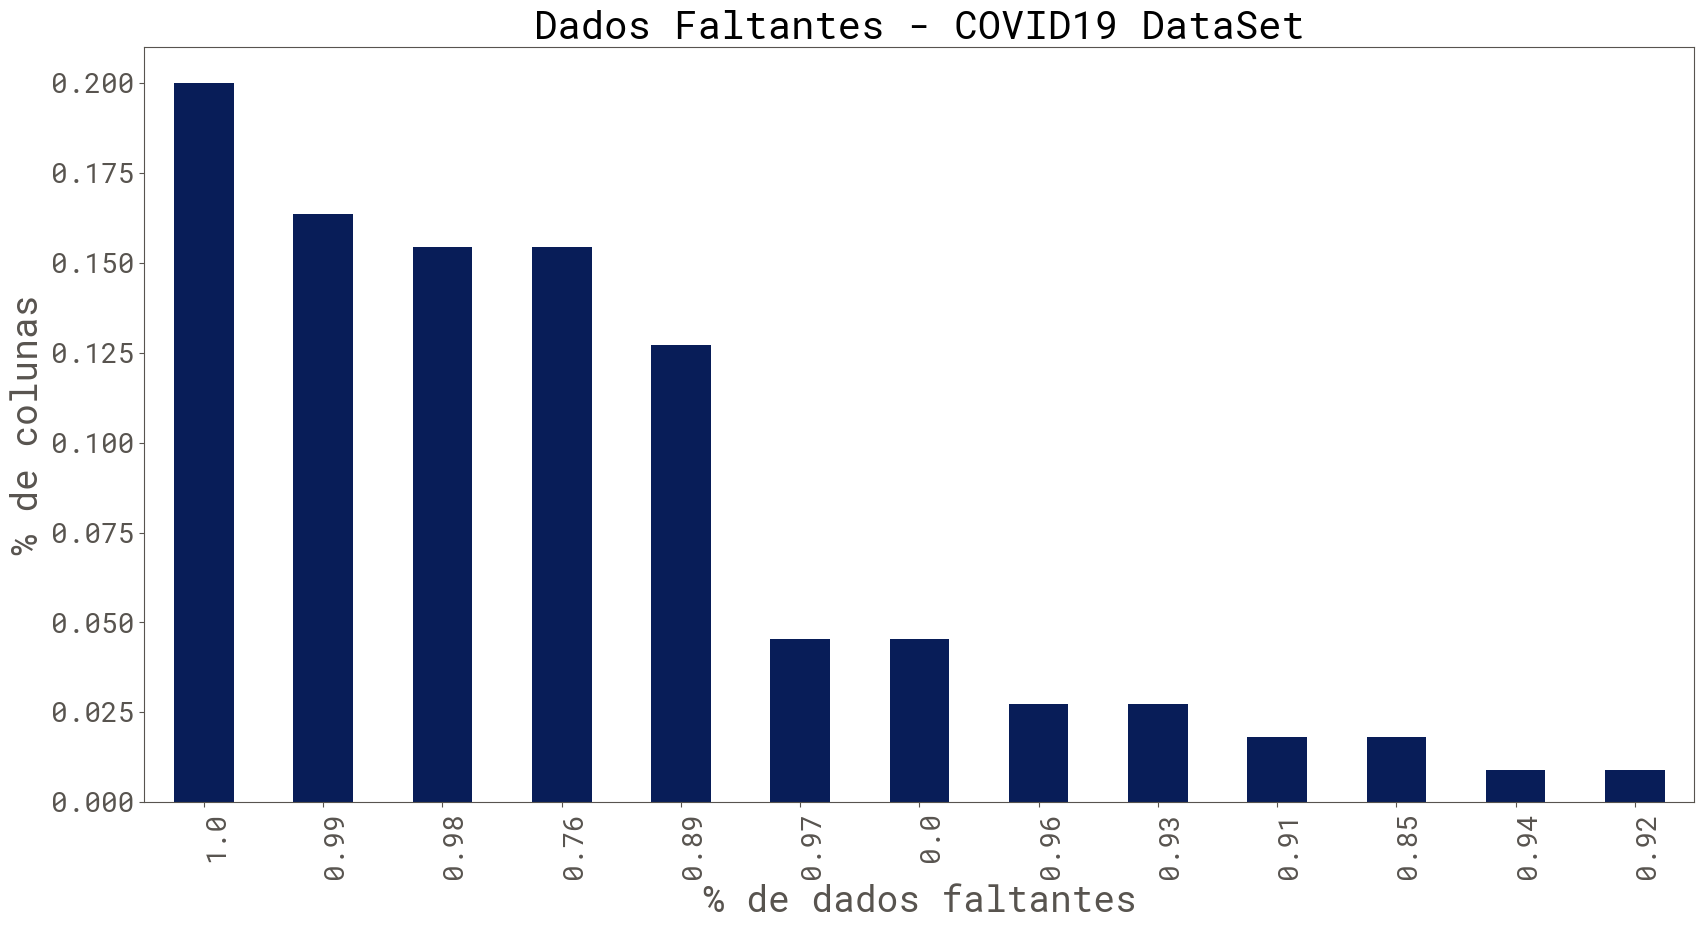

In [10]:
#Vamos começar olhando para as coluna com dados faltantes
gerar_graficos(informacao_df);

In [11]:
#Deletar as colunas com aproximadamente 100% de dados faltantes

#Seleção das colunas
del_colunas = informacao_df.loc[informacao_df["%_NaN"] == 1].index.tolist()

#Deletar as colunas
df1 = df.drop(columns = del_colunas)

In [12]:
# vamos ver quais colunas foram excluídas
del_colunas

['albumin',
 'arteiral fio2',
 'arterial lactic acid',
 'base excess (arterial blood gas analysis)',
 'cto2 (arterial blood gas analysis)',
 'd-dimer',
 'ferritin',
 'fio2 (venous blood gas analysis)',
 'hb saturation (arterial blood gases)',
 'hco3 (arterial blood gas analysis)',
 'lipase dosage',
 'mycoplasma pneumoniae',
 'partial thromboplastin time\xa0(ptt)\xa0',
 'pco2 (arterial blood gas analysis)',
 'ph (arterial blood gas analysis)',
 'phosphor',
 'po2 (arterial blood gas analysis)',
 'prothrombin time (pt), activity',
 'total co2 (arterial blood gas analysis)',
 'urine - nitrite',
 'urine - sugar',
 'vitamin b12']

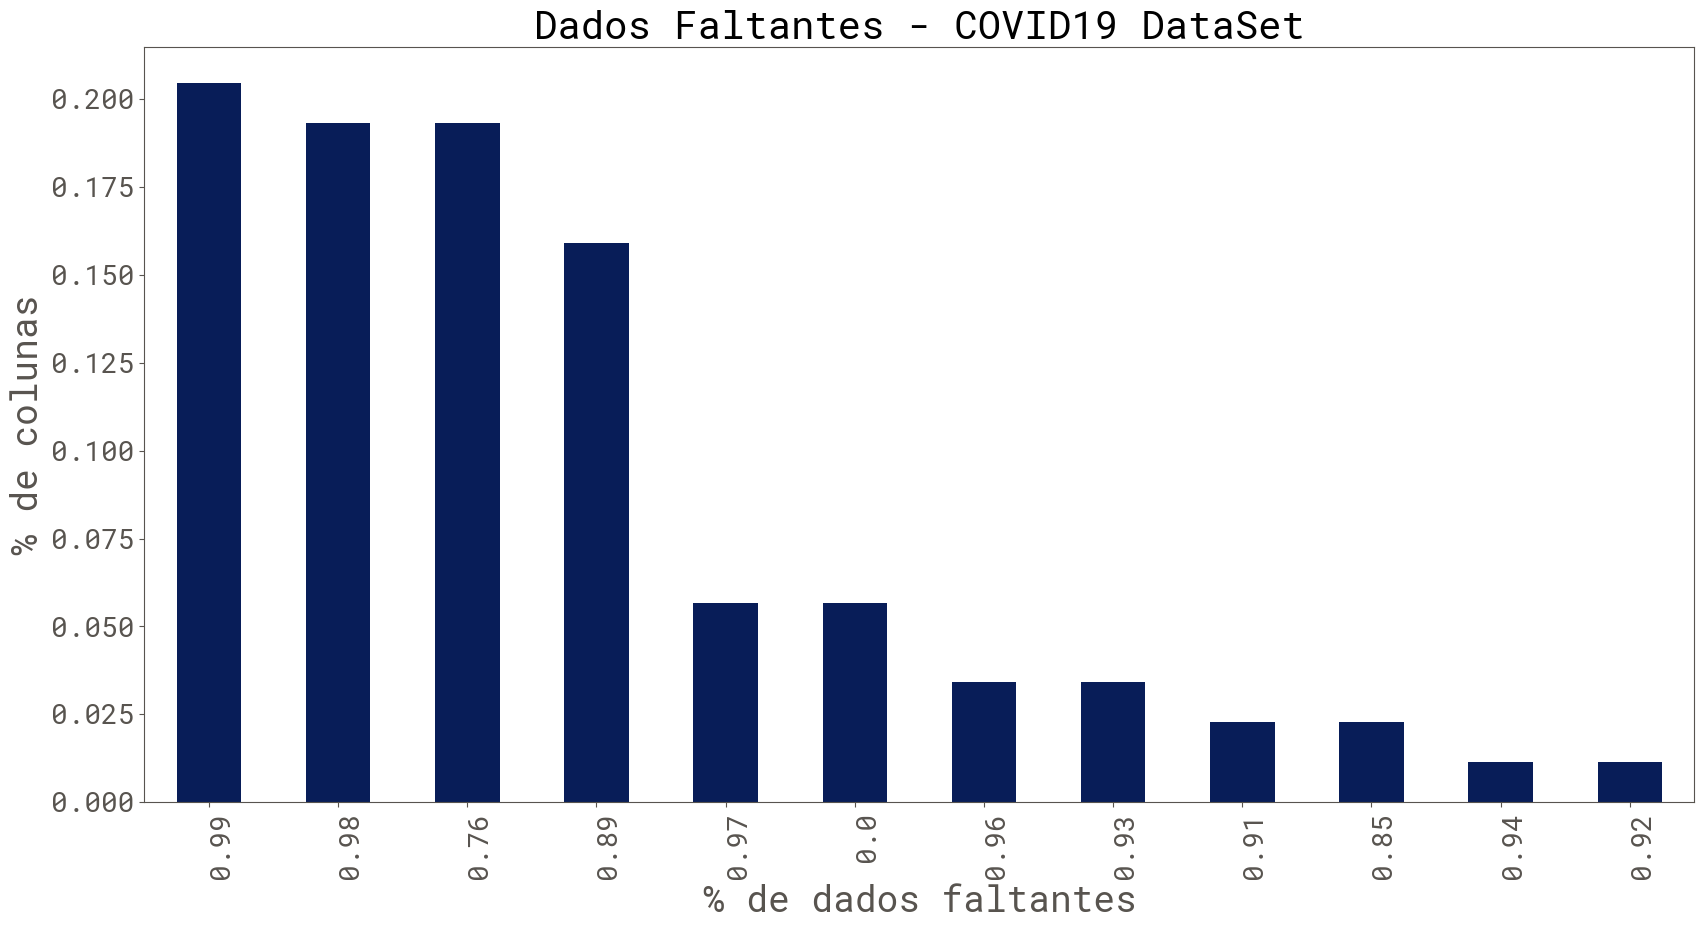

In [13]:
#Recriar o DataFrame com as informações do novo dataset
informacao_df1 = EDA(df1)

gerar_graficos(informacao_df1);

In [14]:
#Vamos Analisar um pouco mais as colunas com muitos dados faltantes (Acima de 90%), que são categóricas
cols = informacao_df1.loc[(informacao_df1["DType"]=="object") \
                             & (informacao_df1["%_NaN"]>=0.9)].index.tolist()

#Vamos imprimir as colunas e seus valores únicos
for col in cols:
    print (col,"  ",df[col].unique().tolist())
    print ("\n")

strepto a    [nan, 'positive', 'negative', 'not_done']


urine - aspect    [nan, 'clear', 'cloudy', 'altered_coloring', 'lightly_cloudy']


urine - bile pigments    [nan, 'absent', 'not_done']


urine - color    [nan, 'light_yellow', 'yellow', 'orange', 'citrus_yellow']


urine - crystals    [nan, 'Ausentes', 'Urato Amorfo --+', 'Oxalato de Cálcio +++', 'Oxalato de Cálcio -++', 'Urato Amorfo +++']


urine - esterase    [nan, 'absent', 'not_done']


urine - granular cylinders    [nan, 'absent']


urine - hemoglobin    [nan, 'absent', 'present', 'not_done']


urine - hyaline cylinders    [nan, 'absent']


urine - ketone bodies    [nan, 'absent', 'not_done']


urine - leukocytes    [nan, '38000', '5942000', '32000', '22000', '<1000', '3000', '16000', '7000', '5300', '1000', '4000', '5000', '10600', '6000', '2500', '2600', '23000', '124000', '8000', '29000', '2000', '624000', '40000', '3310000', '229000', '19000', '28000', '10000', '4600', '77000', '43000']


urine - protein    [nan, 'abse

In [15]:
#Considerando que as colunas acima estão associadas à urina, é bem provável que não seja muito relevante para nosso
#objetivo. Dessa maneira podemos excluir essas colunas sem perda alguma de informação
df2 = df1.drop(columns=cols)

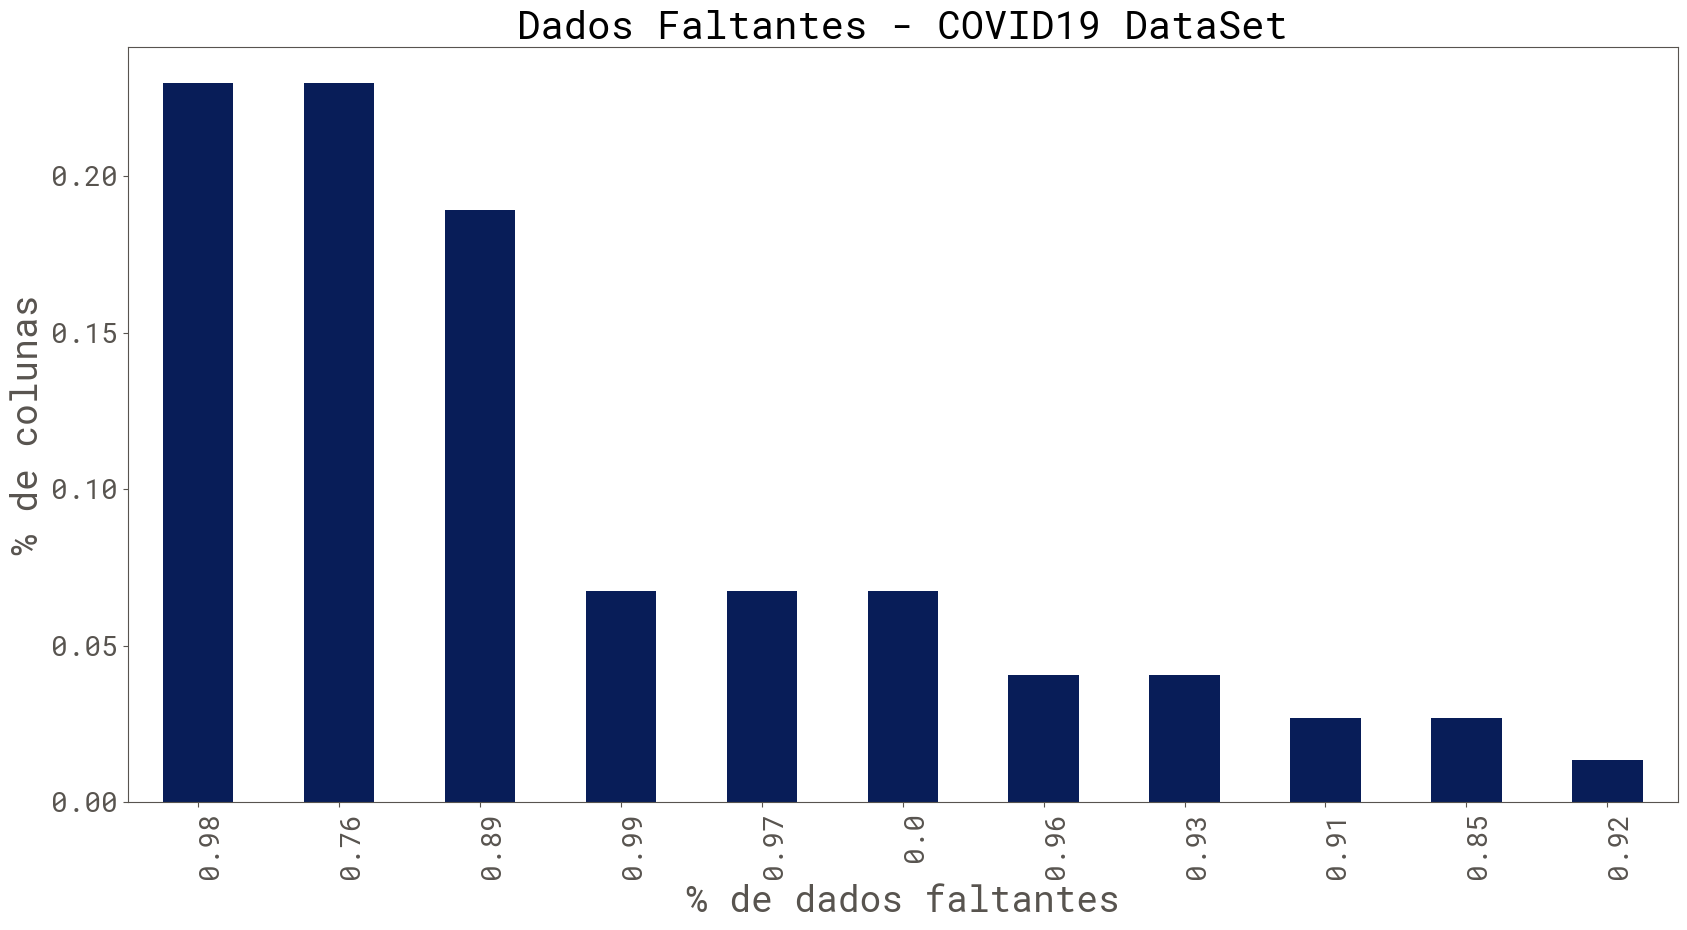

In [16]:
#Recriar o DataFrame com as informações do novo dataset
informacao_df2 = EDA(df2)

gerar_graficos(informacao_df2);

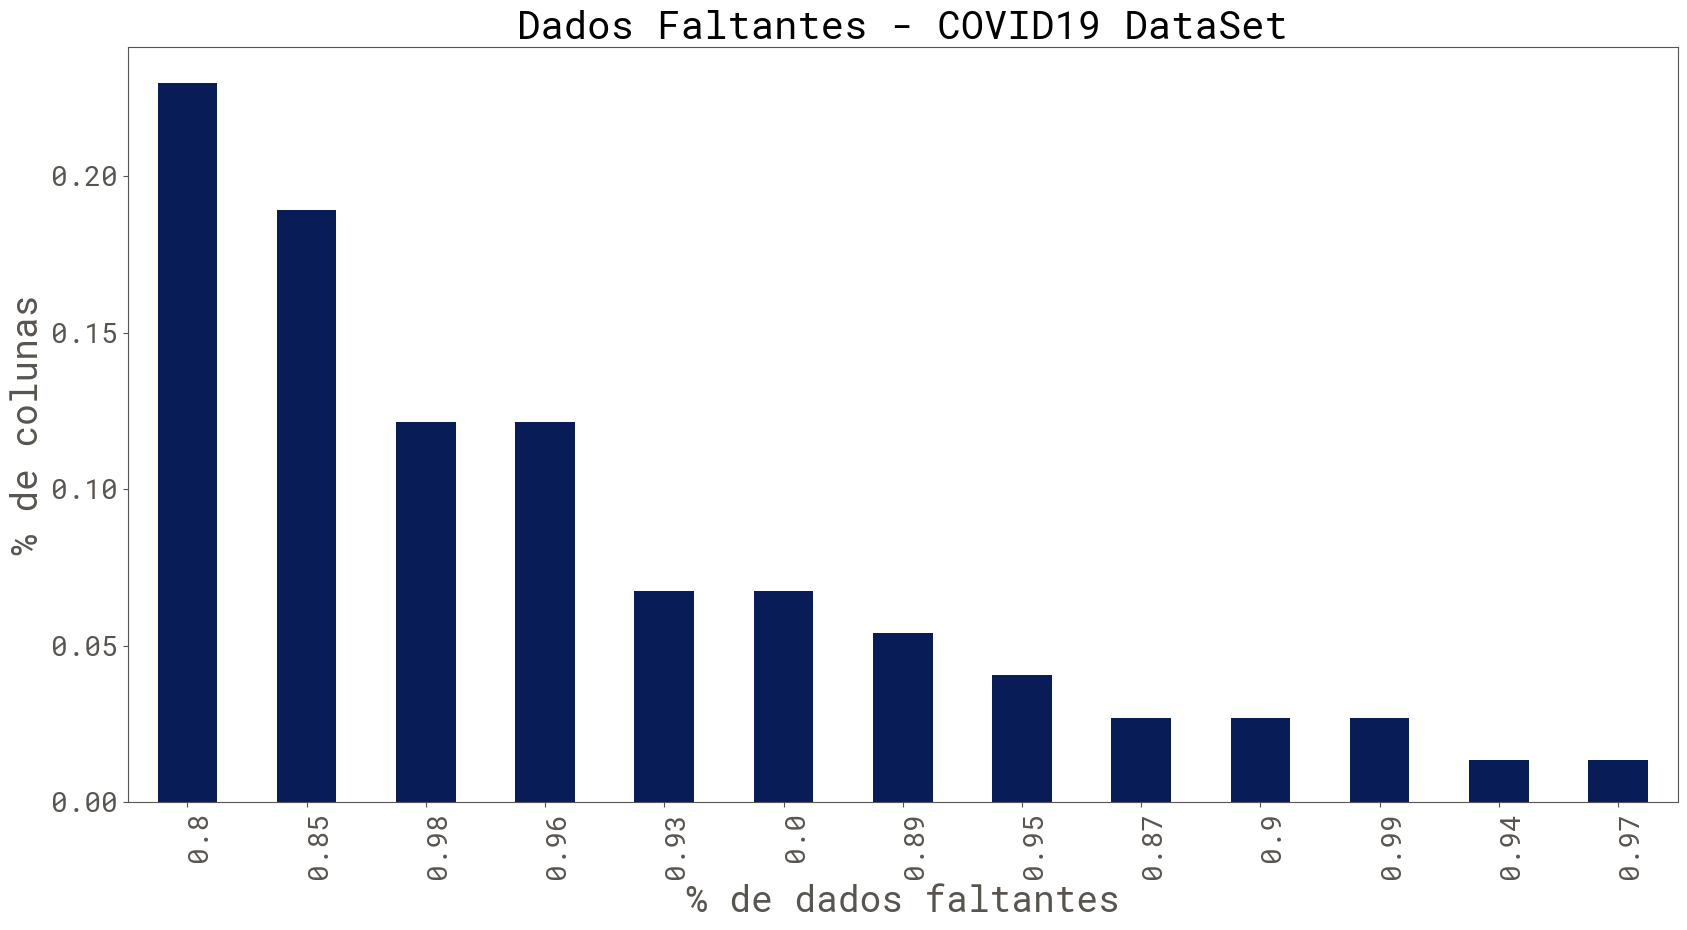

In [17]:
#Para tentarmos entender melhor as colunas, vamos olhar com mais carinho apenas pacientes com COVID
df2_positivos = df2.loc[df2["sars-cov-2 exam result"]=="positive"]

#vamos gerar as informações somente dos pacientes com COVID-19
informacao_df2 = EDA(df2_positivos)

gerar_graficos(informacao_df2);

In [18]:
#Vamos Analisar um pouco mais as colunas quando selecionamos apenas casos positivos para COVID-19
cols = informacao_df2.loc[(informacao_df2["Amount_Unique"]== 2) & \
                          (informacao_df2["DType"]== "object") ].index.tolist()

#cols.remove("sars-cov-2 exam result")

for col in cols:
    if (len(df2_positivos[col].unique().tolist()) ==2):
        print (col,"  ", df2_positivos[col].unique().tolist())
        print ("\n")           

adenovirus    [nan, 'not_detected']


bordetella pertussis    [nan, 'not_detected']


chlamydophila pneumoniae    [nan, 'not_detected']


coronavirus hku1    [nan, 'not_detected']


coronavirusoc43    [nan, 'not_detected']


inf a h1n1 2009    [nan, 'not_detected']


influenza a    [nan, 'not_detected']


influenza a, rapid test    [nan, 'negative']


metapneumovirus    [nan, 'not_detected']


parainfluenza 1    [nan, 'not_detected']


parainfluenza 2    [nan, 'not_detected']


parainfluenza 3    [nan, 'not_detected']


parainfluenza 4    [nan, 'not_detected']


respiratory syncytial virus    [nan, 'not_detected']




### Aqui percebemos que ao selecionarmos apenas casos positivos para COVID-19, há alguma colunas que tem apenas 1 valor, e essas colunas são exames para detectar outros vírus.

In [19]:
#Excluir as colunas acima
df3 = df2.drop(columns=cols) 

In [20]:
df3.shape

(5644, 60)

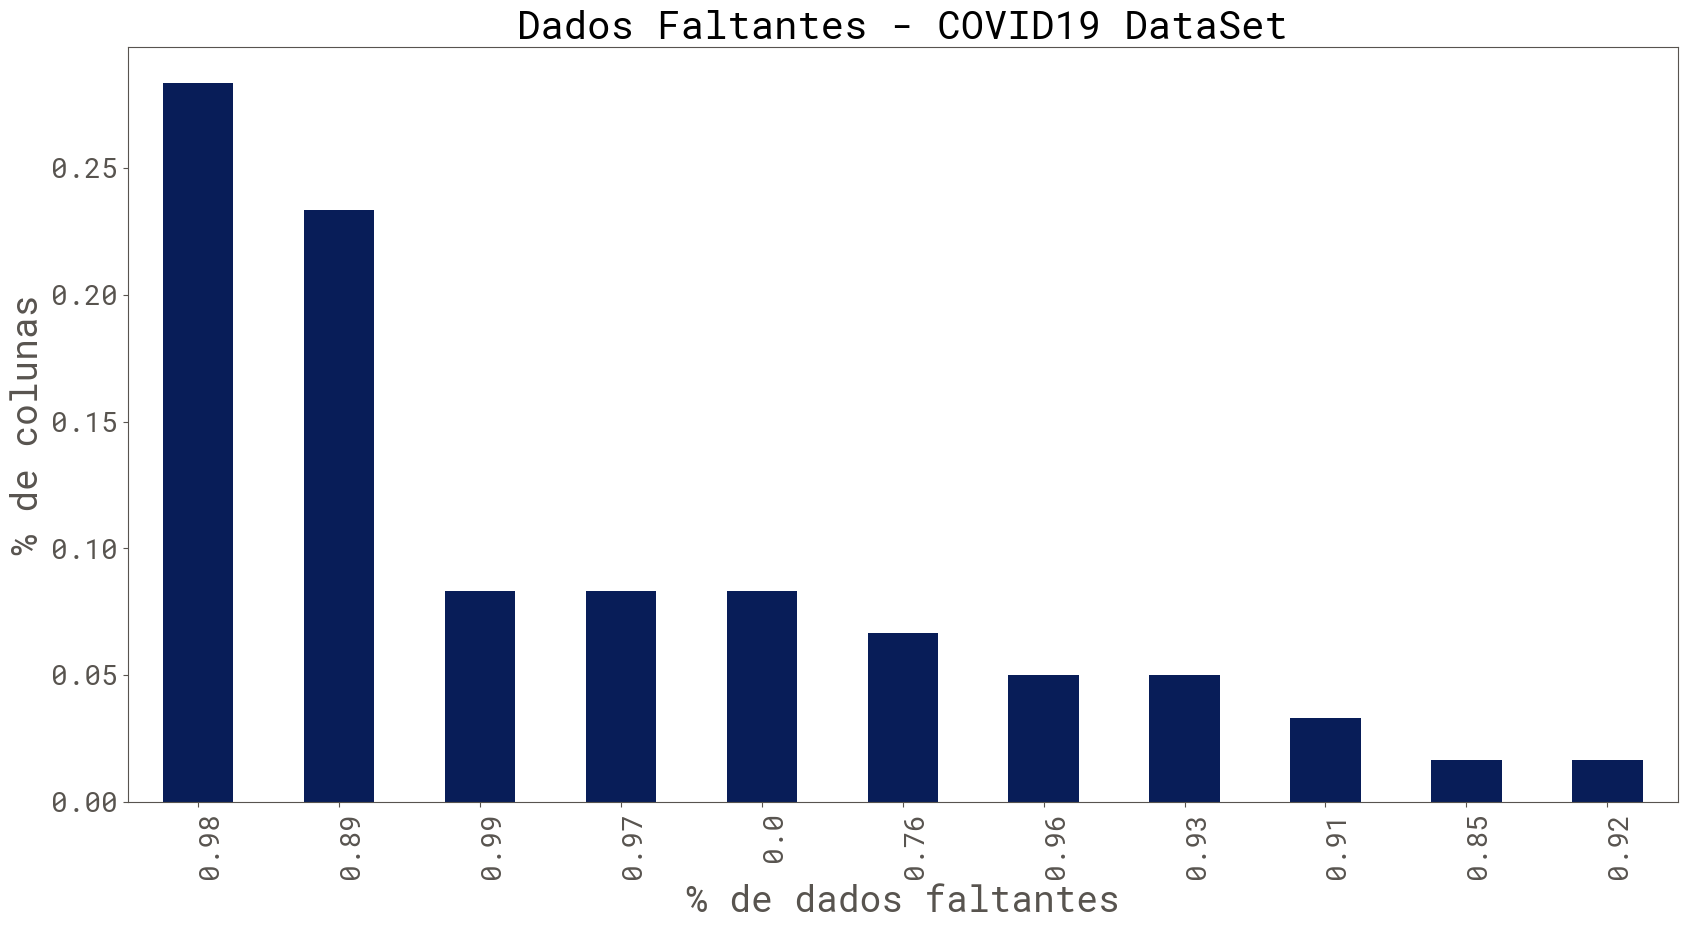

In [21]:
#Recriar o DataFrame com as informações do novo dataset
informacao_df3 = EDA(df3)

gerar_graficos(informacao_df3);

In [22]:
#Após essa limpeza inicial (na qual buscamos entender o significado das colunas excluídas), vamos retirar 
#as colunas do tipo float que apresentam muitos dados faltantes

cols = informacao_df3.loc[(informacao_df3["%_NaN"]> 0.95) & (informacao_df3["DType"] == "float")].index.tolist()

df4 = df3.drop(columns=cols)

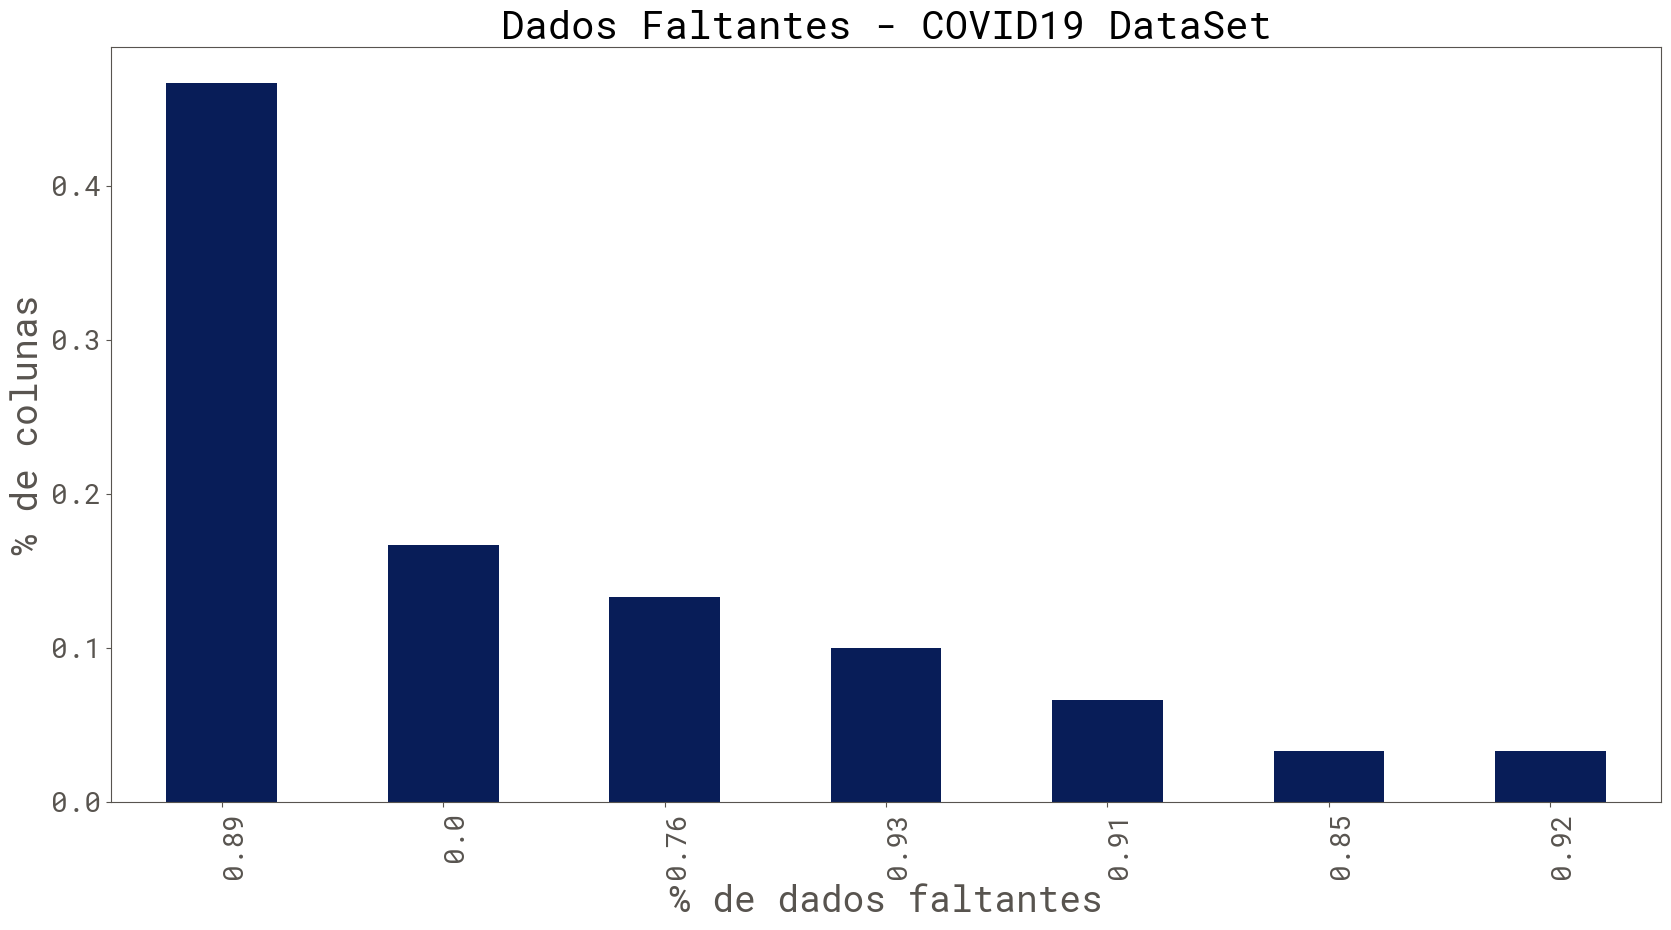

In [23]:
#Vamos conferir como esta o conjunto de dados nesse ponto da limpeza de dados
informacao_df4 = EDA(df4)

gerar_graficos(informacao_df4);

In [24]:
#Vamos excluir linhas que apresentam mas de 50% dos dados faltantes
df5 = df4.dropna(thresh = int(df4.shape[1]*0.5))
df4.shape

(5644, 30)

In [25]:
df5.shape

(602, 30)

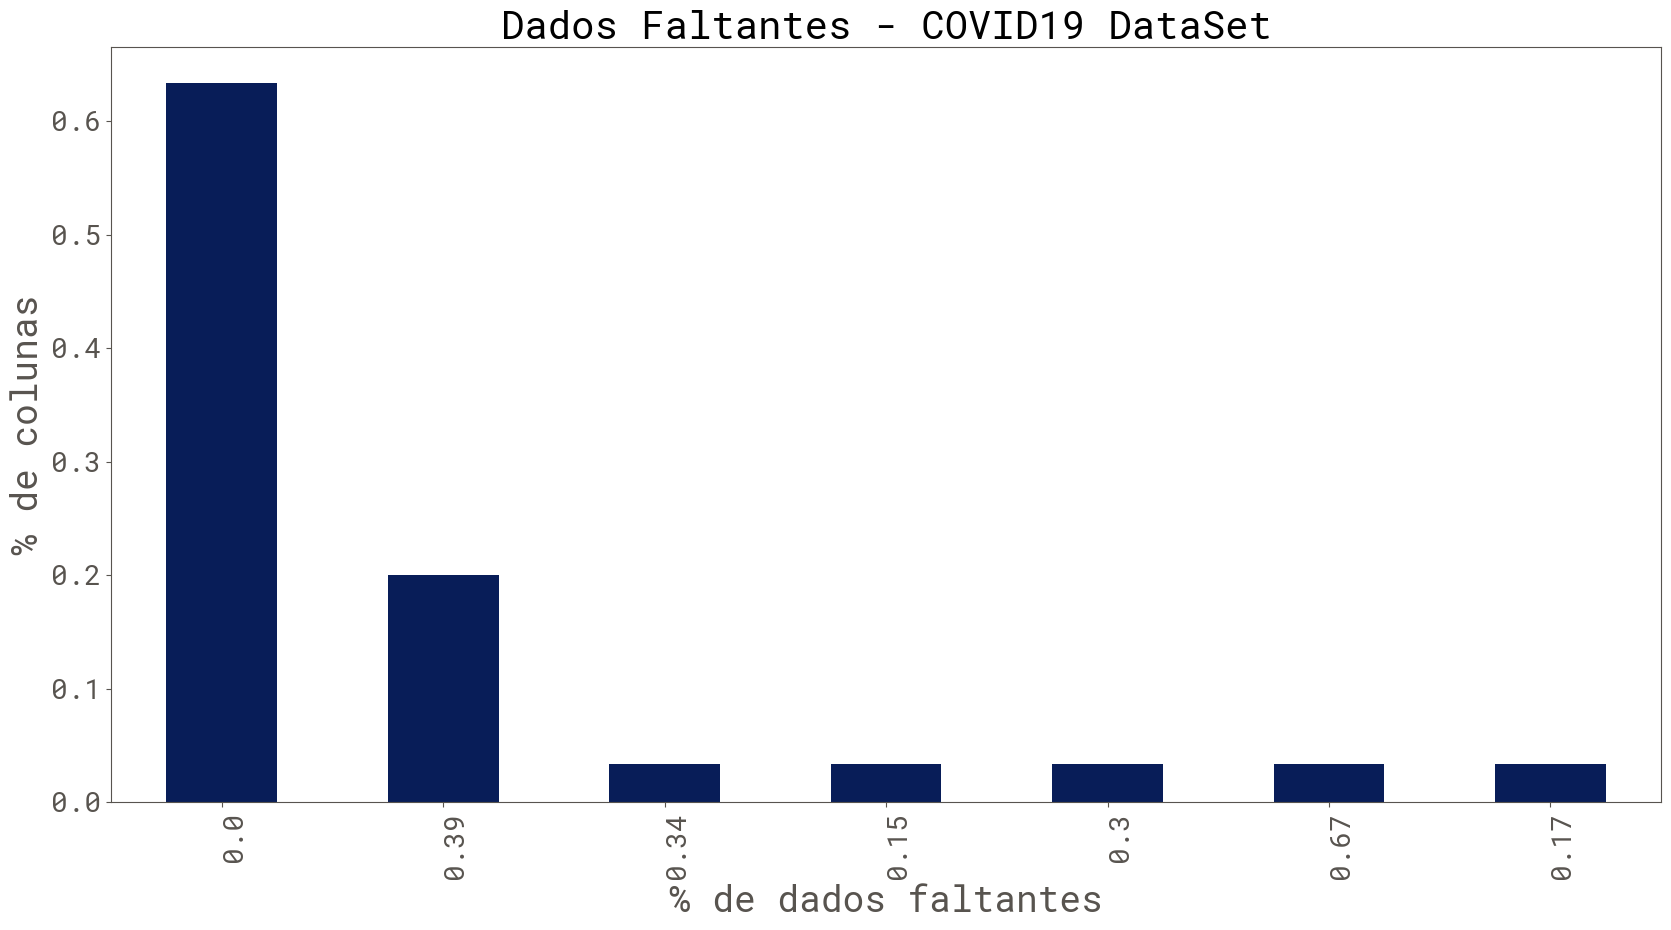

In [26]:
#Atualizando as informações do dataset
informacao_df5 = EDA(df5)

gerar_graficos(informacao_df5);

In [27]:
#Vamos Analisar um pouco mais as colunas com muitos dados faltantes
cols = informacao_df5.loc[(informacao_df5["%_NaN"]==0.67) & (informacao_df5["DType"]!= "int64") ].index.tolist()
cols

['influenza b, rapid test']

In [28]:
#vamos selecionar as colunas que apresentam Influenza no nome
influenza_b_cols = df5.loc[:, df5.columns.str.startswith('influenza')].columns.tolist()
influenza_b_cols

['influenza b', 'influenza b, rapid test']

In [29]:
df6 = df5.drop(columns=influenza_b_cols, axis=1)

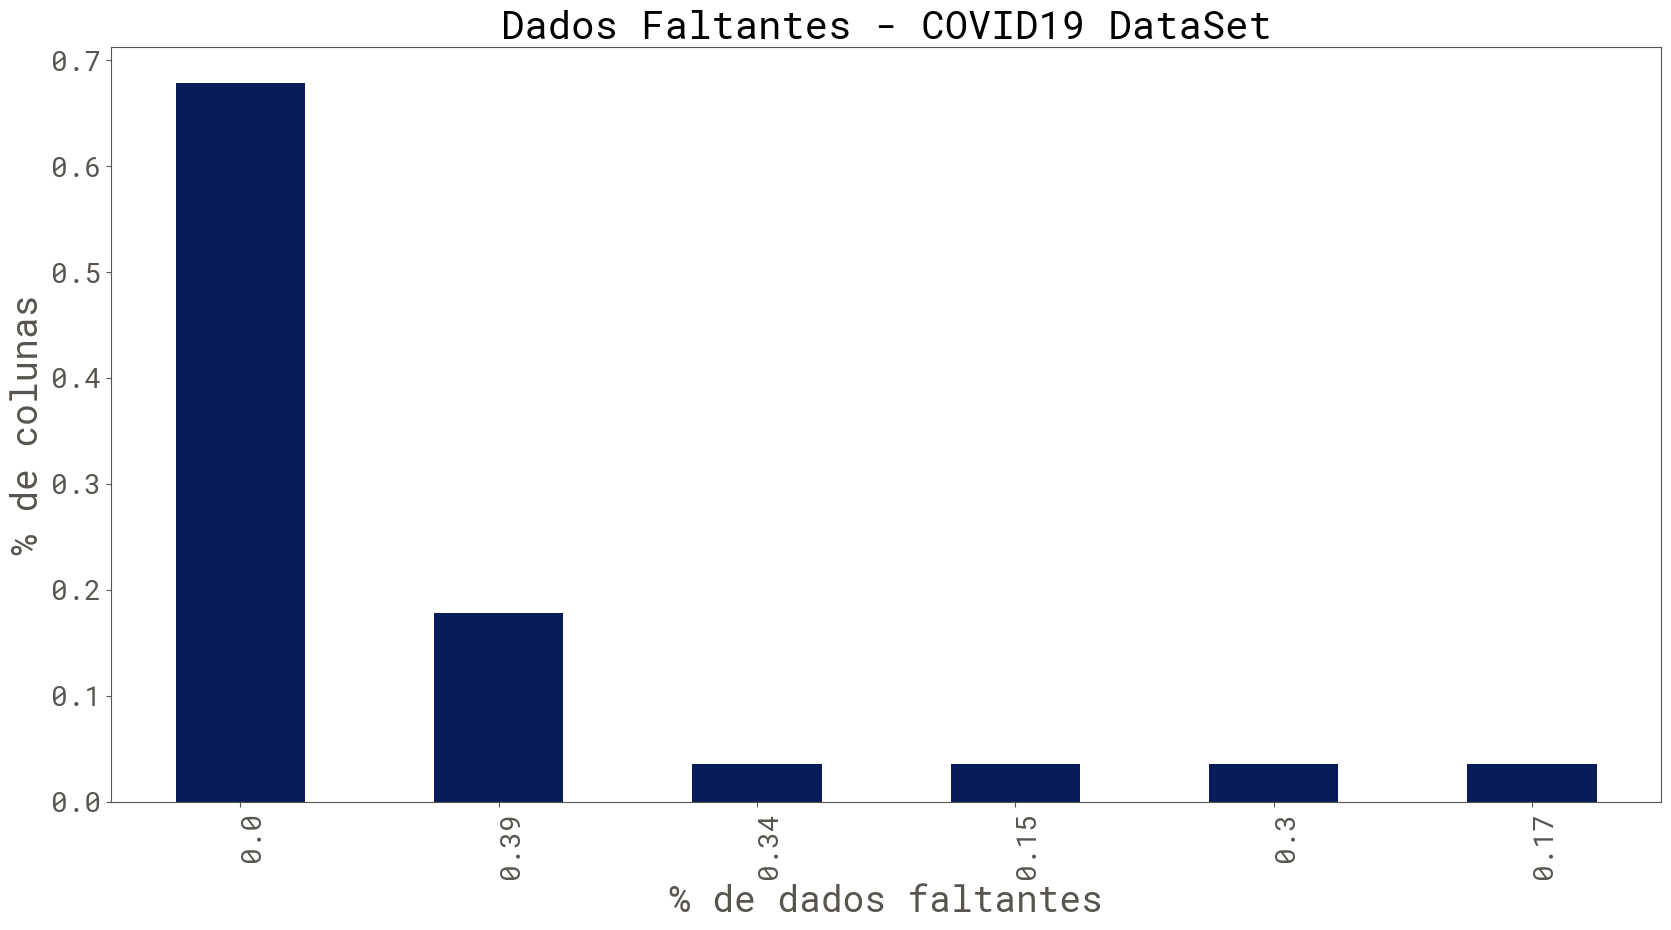

In [30]:
#Atualizar as informações do data set
informacao_df6 = EDA(df6)


gerar_graficos(informacao_df6);

In [31]:
#vamos ver as colunas que apresentam mais dados faltantes
cols = informacao_df6.loc[(informacao_df6["%_NaN"] == 0.39) & (informacao_df6["DType"]== "object") ].index.tolist()
cols

['coronavirus229e', 'coronavirusnl63', 'rhinovirus/enterovirus']

In [32]:
#como são exames relacionadas à outras doenças vamos exclui-las
df7 = df6.drop(columns=cols)

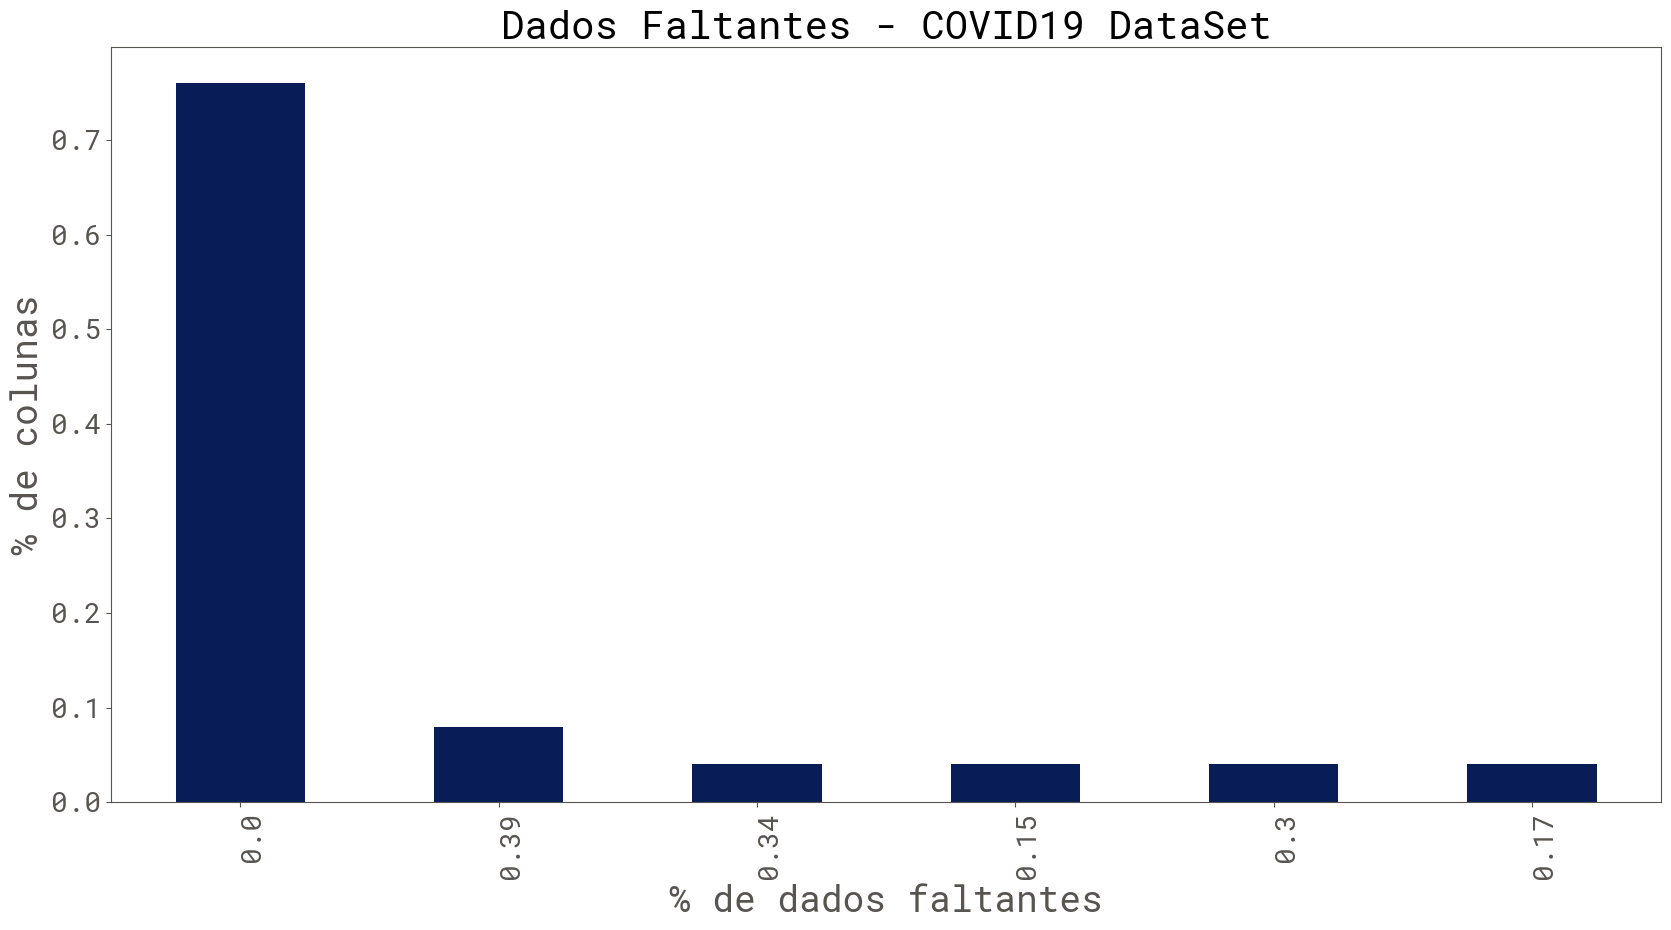

In [33]:
#Atualizar as informações do data set
informacao_df7 = EDA(df7)

gerar_graficos(informacao_df7);

In [34]:
#Vamos ver as informações que contém nas colunas que apresentam mais de 30% de dados faltantes
cols = informacao_df7.loc[(informacao_df7["%_NaN"] >= 0.3)].index.tolist()                                      
cols

['creatinine', 'potassium', 'sodium', 'urea']

In [35]:
#No primeiro instante não parecem informações relevantes para nosso objetivo
df8 = df7.drop(columns=cols)

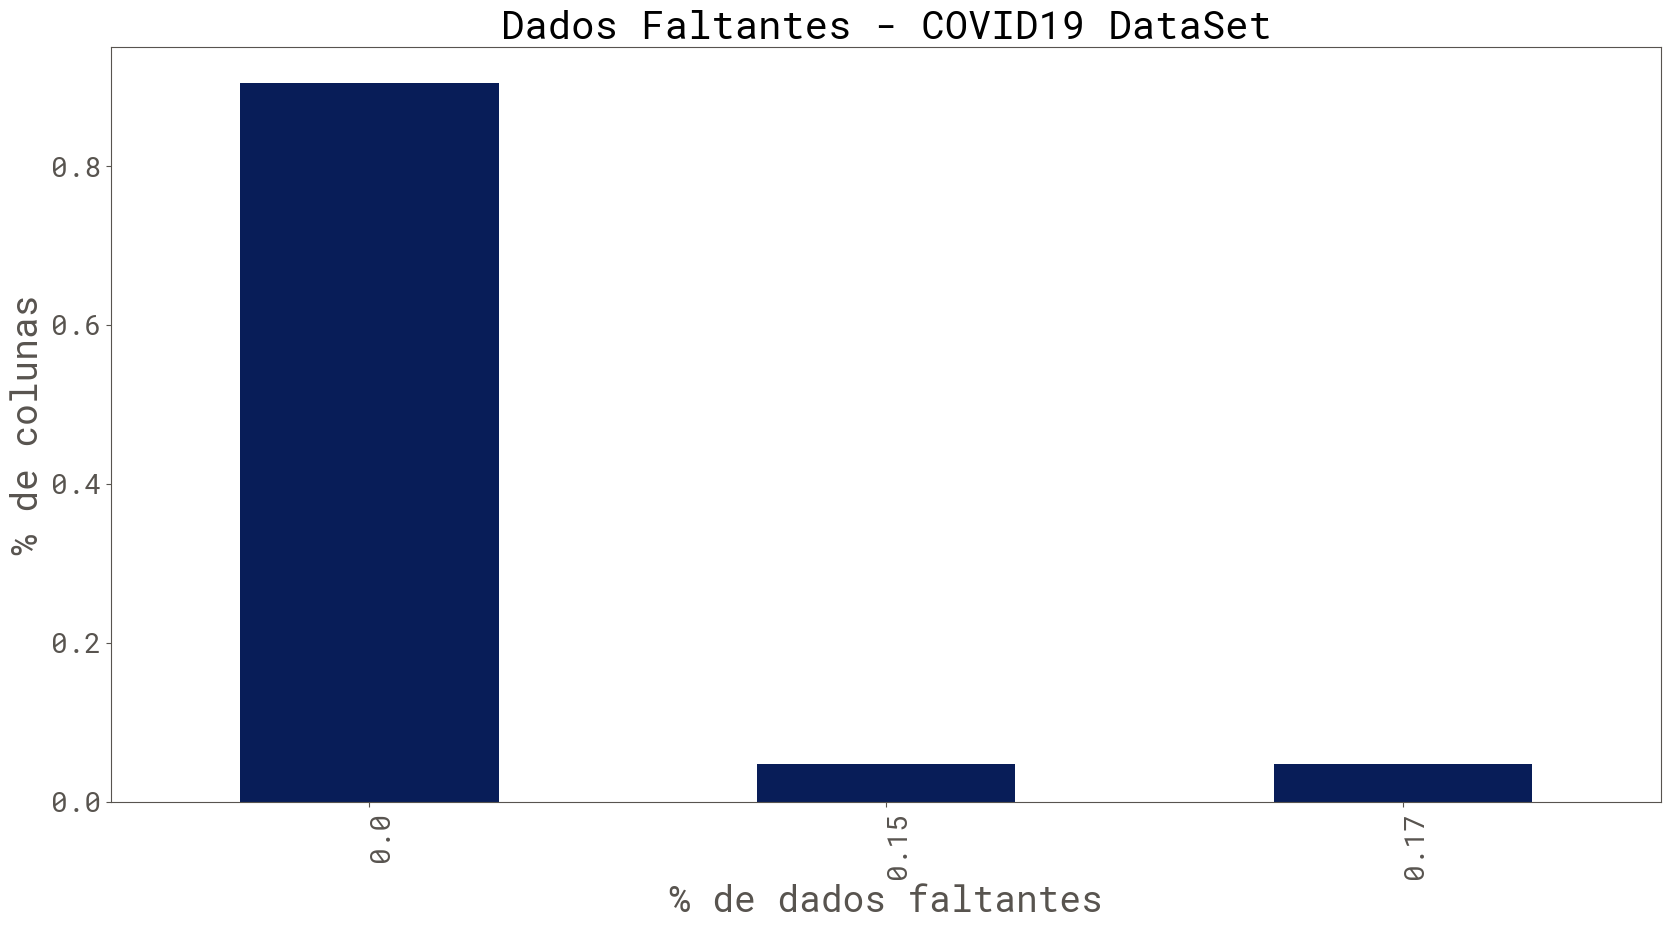

In [36]:
#Atualizar as informações sobre o dataset
informacao_df8 = EDA(df8)

gerar_graficos(informacao_df8);

In [37]:
df9 = df8.fillna(df8.median())

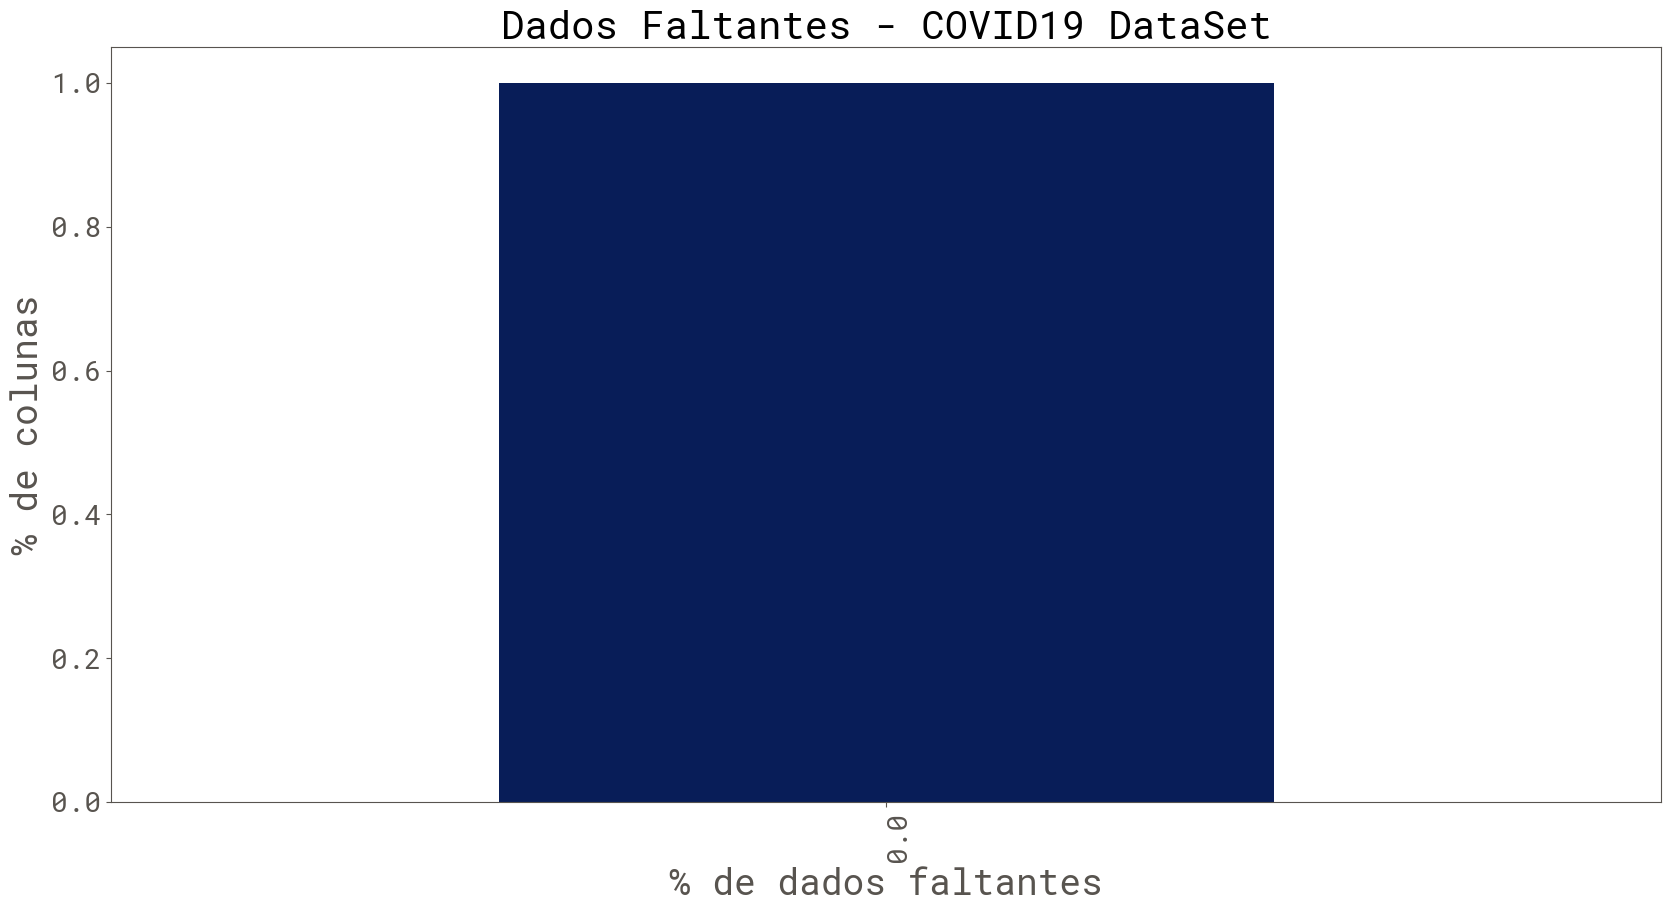

In [38]:
#Atualizar as informações sobre o dataset
informacao_df9 = EDA(df9)

gerar_graficos(informacao_df9);

In [39]:
informacao_df9

,Amount_NaN,%_NaN,DType,Amount_Data,Mean,Median,Max,Min,STD,Amount_Unique
basophils,0,0.0,float64,602,-0.00,-0.22,11.0782,-1.14014,1.00,17
eosinophils,0,0.0,float64,602,0.00,-0.33,8.35088,-0.835508,1.00,86
hematocrit,0,0.0,float64,602,-0.00,0.05,2.6627,-4.50142,1.00,176
hemoglobin,0,0.0,float64,602,-0.00,0.04,2.67187,-4.3456,1.00,84
leukocytes,0,0.0,float64,602,0.00,-0.21,4.52204,-2.0203,1.00,475
lymphocytes,0,0.0,float64,602,-0.00,-0.01,3.7641,-1.86507,1.00,318
mean corpuscular hemoglobin (mch),0,0.0,float64,602,-0.00,0.13,4.09855,-5.9376,1.00,91
mean corpuscular hemoglobin concentration (mchc),0,0.0,float64,602,0.00,-0.05,3.33107,-5.43181,1.00,57
mean corpuscular volume (mcv),0,0.0,float64,602,-0.00,0.07,3.41098,-5.10158,1.00,190
mean platelet volume,0,0.0,float64,602,-0.00,-0.10,3.71305,-2.45757,1.00,48


In [40]:
df9.head()

,patient age quantile,sars-cov-2 exam result,"patient addmited to regular ward (1=yes, 0=no)","patient addmited to semi-intensive unit (1=yes, 0=no)","patient addmited to intensive care unit (1=yes, 0=no)",hematocrit,hemoglobin,platelets,mean platelet volume,red blood cells,...,mean corpuscular hemoglobin concentration (mchc),leukocytes,basophils,mean corpuscular hemoglobin (mch),eosinophils,mean corpuscular volume (mcv),monocytes,red blood cell distribution width (rdw),neutrophils,proteina c reativa mg/dl
1,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,...,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.619086,-0.147895
8,1,negative,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,...,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,-0.127395,-0.286986
15,9,negative,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,...,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,0.880570,-0.393291
18,11,negative,0,0,0,0.991838,0.792188,0.072992,-0.550290,0.542763,...,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,0.265957,-0.487674
22,9,negative,0,0,0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,...,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,-0.422410,-0.393291


In [41]:
df9.shape

(602, 21)

### Agora é com vocês!
Retirada dos campos de internação

In [42]:
df9 = df9.drop(columns=['sars-cov-2 exam result'])
df9 = df9.drop(columns=['patient addmited to regular ward (1=yes, 0=no)'])
df9 = df9.drop(columns=['patient addmited to semi-intensive unit (1=yes, 0=no)'])
df9 = df9.drop(columns=['patient addmited to intensive care unit (1=yes, 0=no)'])
df9.head()


,patient age quantile,hematocrit,hemoglobin,platelets,mean platelet volume,red blood cells,lymphocytes,mean corpuscular hemoglobin concentration (mchc),leukocytes,basophils,mean corpuscular hemoglobin (mch),eosinophils,mean corpuscular volume (mcv),monocytes,red blood cell distribution width (rdw),neutrophils,proteina c reativa mg/dl
1,17,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.619086,-0.147895
8,1,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,-0.127395,-0.286986
15,9,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,0.880570,-0.393291
18,11,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,0.265957,-0.487674
22,9,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,-0.422410,-0.393291


Recorte em teste e treino

In [54]:
import sklearn.model_selection as model_selection
import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
form 
X_train, X_test = train_test_split(df9, test_size=0.3, random_state=int(time.time()))


In [44]:
X_train.shape

(421, 17)

In [45]:
X_test.shape

(181, 17)

In [60]:
# Instantiate the classifier
#gnb = GaussianNB()
used_features =[
    "patient age quantile",
    "hematocrit",
    "hemoglobin",
    "platelets",
    "mean platelet volume",
    "red blood cells",
    "lymphocytes"
]

gnb.fit(X_train[used_features].values, X_train["covid"])
y_pred = gnb.predict(X_test[used_features])

KeyError: "['mean platelet volume'] not in index"